## Shortcuts:
* Shift + Enter
* a, b, dd, [x, c & v]
* Tab-completion
* Question mark (?)
* package.module.function

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D  # for 3D plot

path = 'C:\\Users\\fomyt\\Documents\\ADS_Fall2016\\Notebook'

Populating the interactive namespace from numpy and matplotlib


# Example 1, basics

## Data drawn from $ y = 3x_1 - x_2 - 11 + \epsilon$ , where $\space \epsilon \sim \mathscr{N}(0,3^2)$

In [64]:
data1 = pd.read_csv(path + '\\Example1.csv')
data1.head()

,x1,x2,y
0,1.964692,-2.138607,-5.605927
1,-2.731485,0.513148,-18.856722
2,2.194690,-0.768935,-6.063095
3,4.807642,1.848297,-3.608380
4,-0.190681,-1.078825,-11.665918


In [117]:
#Q1. Use statsmodels to regress y over x1 and x2, provide the r-squared and coefficients

lm1 = smf.ols(formula = 'y ~ x1 + x2', data = data1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.776112
Intercept   -10.104985
x1            2.676798
x2           -0.706135
dtype: float64


In [66]:
#Q2. Create a new column x0 for intercept, set the values to 1

data1['x0'] = 1

#### $$\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} $$

In [67]:
#Q3. Create X and Y in matrix form then use matrix computation formula to calculate the coefficients

X = np.matrix(data1.loc[:,['x0','x1','x2']])
Y = np.mat(data1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[-10.10498527]
 [  2.67679769]
 [ -0.70613511]]


In [68]:
#Q4. Compare the coefficients obtained through different methods

trueCoef = [-11, 3, -1]
pd.DataFrame({'MatrixComputation':w.tolist(), 'Regression':lm1.params, 'TrueValue':trueCoef})
# First create a dict object, claiming the labels and respective data, then convert it to a data frame

,MatrixComputation,Regression,TrueValue
Intercept,[-10.1049852733],-10.104985,-11
x1,[2.67679768576],2.676798,3
x2,[-0.706135109154],-0.706135,-1


In [69]:
#Q5. Find the range (max/min) of the variables x1 and x2, then plot the observations and the prediction plane in a 3D plot
data1.describe()

,x1,x2,y,x0
count,20.000000,20.000000,20.000000,20.0
mean,0.027218,-0.075481,-9.978829,1.0
std,2.397628,2.247203,7.251472,0.0
min,-4.078951,-4.403221,-24.968052,1.0
25%,-1.428640,-1.797155,-14.739759,1.0
50%,-0.652825,-0.022391,-9.617834,1.0
75%,2.022191,1.444395,-6.344681,1.0
max,4.807642,3.933892,7.571092,1.0


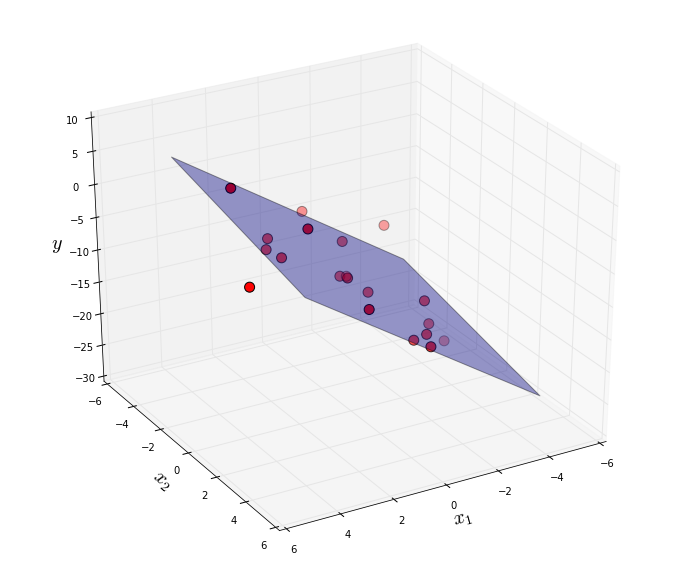

In [70]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(data1.x1, data1.x2, data1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
xx, yy = np.meshgrid(range(-5,5), range(-5,5))
zz = lm1.params[0] + lm1.params[1] * xx + lm1.params[2] * yy

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(xx, yy, zz, color='b', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

# Example 2, car price

**VARIABLE DESCRIPTIONS:**
* Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition. 
* Mileage: number of miles the car has been driven
* Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
* Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
* Cylinder: number of cylinders in the engine	
* Liter: a more specific measure of engine size	
* Doors: number of doors	
* Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
* Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
* Leather: indicator variable representing whether the car has leather seats (1 = leather)

In [108]:
data2 = pd.read_excel(path + '\\Car.xls')
data2.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [109]:
#Q1. Check the correlation matrix, see if there's multicolinearity

In [110]:
data2.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


**Cylinder** and **Liter**: 0.96

In [111]:
#Q2. Ignore "Make, Model, and Cylinder", simply regress the Price over the others, see how well this model is

In [112]:
# Small trick of writing the formula, no need to write them all manually
' + '.join(data2.columns[7:])

u'Liter + Doors + Cruise + Sound + Leather'

In [113]:
lm2 = smf.ols(formula = 'Price ~ Mileage + ' + ' + '.join(data2.columns[7:]), data = data2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     98.11
Date:                Wed, 14 Sep 2016   Prob (F-statistic):           2.77e-92
Time:                        18:34:38   Log-Likelihood:                -8313.8
No. Observations:                 804   AIC:                         1.664e+04
Df Residuals:                     797   BIC:                         1.667e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.15e+04   1702.513      6.754      0.0

In [114]:
# For comparison purpose only, we try to include the Cylinder column and see if the result will be significantly improved
lm2 = smf.ols(formula = 'Price ~ Mileage + ' + ' + '.join(data2.columns[6:]), data = data2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     91.64
Date:                Wed, 14 Sep 2016   Prob (F-statistic):           8.80e-98
Time:                        18:34:38   Log-Likelihood:                -8298.5
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     796   BIC:                         1.665e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6758.7551   1876.967      3.601      0.0

In [115]:
#Q3. Common sense tells us that the brand of the car should play an important roles here
# Now let's take "Make" into consideration, see how important it can be
data2.Make.unique()

array([u'Buick', u'Cadillac', u'Chevrolet', u'Pontiac', u'SAAB', u'Saturn'], dtype=object)

In [116]:
# Re-run our regression with brands
lm2_updated = smf.ols(formula = 'Price ~ Mileage + Make + ' + ' + '.join(data2.columns[7:]), data = data2).fit()
print(lm2_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     523.0
Date:                Wed, 14 Sep 2016   Prob (F-statistic):               0.00
Time:                        18:34:38   Log-Likelihood:                -7687.1
No. Observations:                 804   AIC:                         1.540e+04
Df Residuals:                     792   BIC:                         1.545e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.532e+04   1055.42

A few observations:
* $R^2$ increases significantly
* Suddenly "Sound" and "Leather" don't matter anymore, judging by their p-value
* Brands do matter